In [1]:
!git clone https://github.com/Musoye/BrainTumorDetection.git

Cloning into 'BrainTumorDetection'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 21 (delta 9), reused 19 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 4.25 KiB | 4.25 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
%cd BrainTumorDetection

/content/BrainTumorDetection


In [3]:
!ls

evaluate.py  model.py  preparation.py  resnet.py  retrieve.py  setting.py


In [4]:
%run -i evaluate.py
%run -i model.py
%run -i preparation.py
%run -i resnet.py
%run -i retrieve.py
%run -i setting.py


In [5]:
from google.colab import files

upload = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 73% 11.0M/15.1M [00:00<00:00, 92.0MB/s]
100% 15.1M/15.1M [00:00<00:00, 82.9MB/s]


In [9]:
!ls

brain-mri-images-for-brain-tumor-detection.zip	kaggle.json  preparation.py  retrieve.py
evaluate.py					model.py     resnet.py	     setting.py


In [10]:
!unzip brain-mri-images-for-brain-tumor-detection.zip -d brain_mri

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_mri/brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_mri/brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_mri/brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/24 no.jpg  
  inflating: br

In [11]:
addr = 'brain_mri/brain_tumor_dataset'
train_loader, val_loader = get_data_loader(addr)

{'no': 0, 'yes': 1}


In [12]:
model = BrainTumorClassifier()
resnet_model = get_resnet_model(num_classes=2)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 76.7MB/s]


In [13]:
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
resnet_optimizer = torch.optim.Adam(model.parameters(), lr=lr)
resnet_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

Epoch 0/7, Train Loss: 0.8475, Train Accuracy: 0.5891, LR: 0.001000

Epoch 1/7, Validation Accuracy: 0.7451
Epoch 2/7, Validation Accuracy: 0.7451
Epoch 2/7, Train Loss: 0.5440, Train Accuracy: 0.7574, LR: 0.001000

Epoch 3/7, Validation Accuracy: 0.7255
Epoch 4/7, Validation Accuracy: 0.7059
Epoch 4/7, Train Loss: 0.2446, Train Accuracy: 0.8960, LR: 0.001000

Epoch 5/7, Validation Accuracy: 0.7451
Epoch 6/7, Validation Accuracy: 0.7451
Epoch 6/7, Train Loss: 0.1140, Train Accuracy: 0.9505, LR: 0.001000

Epoch 7/7, Validation Accuracy: 0.7451


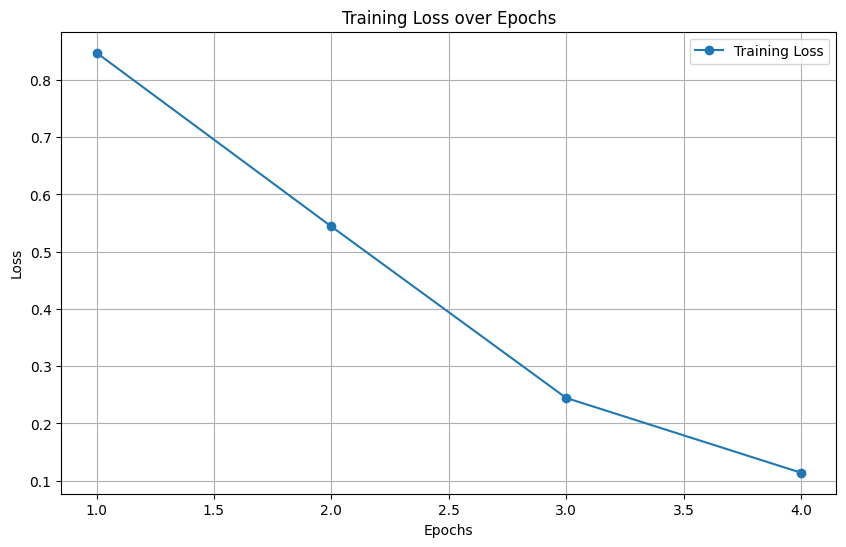

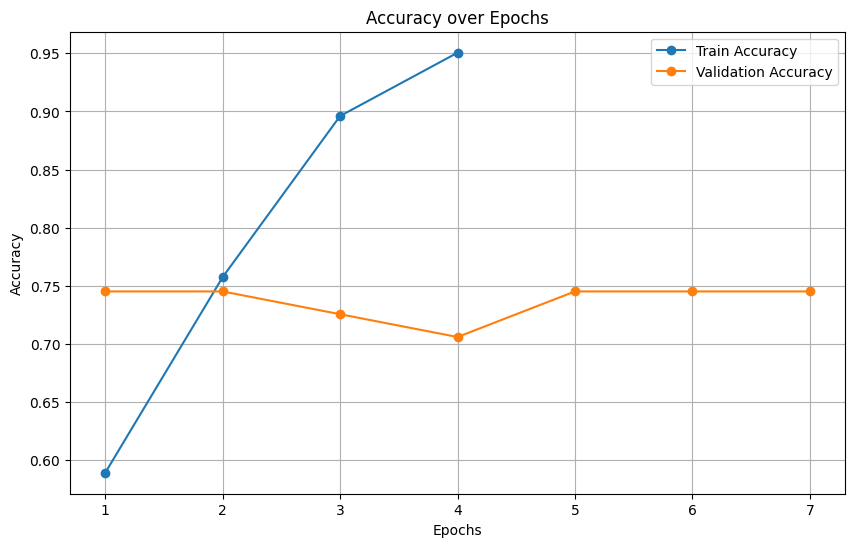

In [14]:
train_and_evaluate(model=model, optimizer=optimizer, scheduler=scheduler, train_loader=train_loader, val_loader=val_loader, num_epochs=7, lr=0.001, log_epoch=2)

Epoch 0/7, Train Loss: 0.6819, Train Accuracy: 0.5842, LR: 0.001000

Epoch 1/7, Validation Accuracy: 0.5098
Epoch 2/7, Validation Accuracy: 0.6667
Epoch 2/7, Train Loss: 0.6864, Train Accuracy: 0.5941, LR: 0.001000

Epoch 3/7, Validation Accuracy: 0.6275
Epoch 4/7, Validation Accuracy: 0.5882
Epoch 4/7, Train Loss: 0.6844, Train Accuracy: 0.5891, LR: 0.001000

Epoch 5/7, Validation Accuracy: 0.5882
Epoch 6/7, Validation Accuracy: 0.6275
Epoch 6/7, Train Loss: 0.6845, Train Accuracy: 0.5891, LR: 0.001000

Epoch 7/7, Validation Accuracy: 0.6275


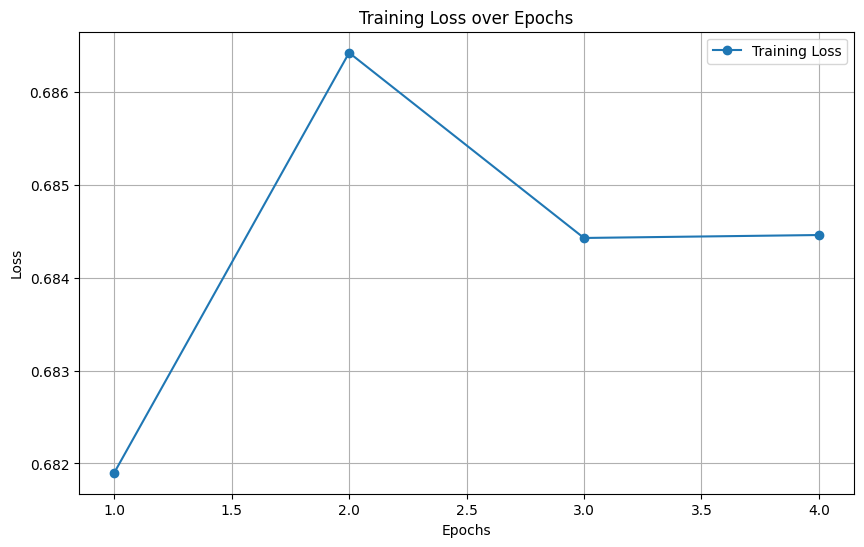

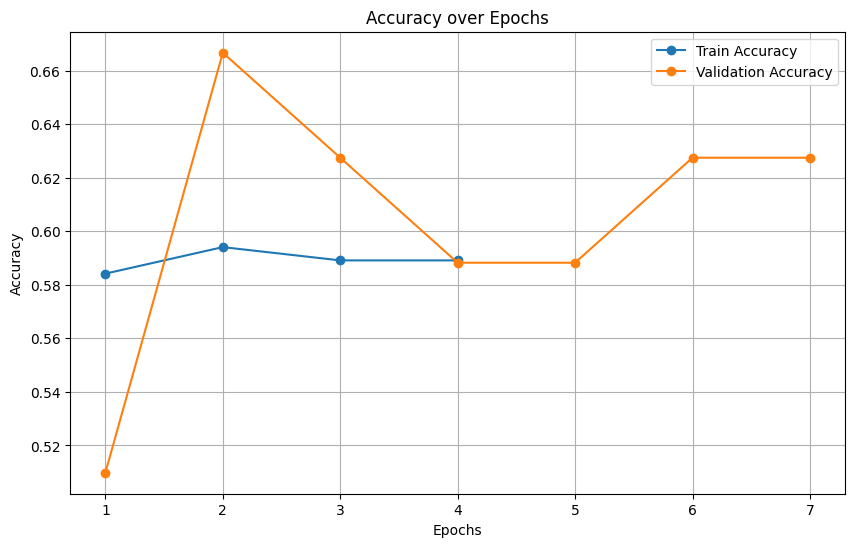

In [15]:
train_and_evaluate(model=resnet_model, optimizer=resnet_optimizer, scheduler=resnet_scheduler, train_loader=train_loader, val_loader=val_loader, num_epochs=7, lr=0.001, log_epoch=2)

In [16]:
save_model(model=model, optimizer=optimizer, scheduler=scheduler, epoch=7, filepath='set_brain-tumor.pth')

Model saved to set_brain-tumor.pth


In [17]:
save_model(model=resnet_model, optimizer=resnet_optimizer, scheduler=resnet_scheduler, epoch=7, filepath='resnet_brain-tumor.pth')

Model saved to resnet_brain-tumor.pth


In [18]:
!ls

brain_mri					model.py		retrieve.py
brain-mri-images-for-brain-tumor-detection.zip	preparation.py		set_brain-tumor.pth
evaluate.py					resnet_brain-tumor.pth	setting.py
kaggle.json					resnet.py


In [19]:
from google.colab import files

files.download('set_brain-tumor.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
files.download('resnet_brain-tumor.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>